In [96]:
import numpy as np
import pandas as pd

In [97]:
data=pd.read_csv('../Dataset/zomato.csv')
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [98]:
data.shape
data.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [99]:
data.isna().sum()


url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [100]:
data=data.drop(columns=['url','address','name','phone','reviews_list','menu_item','dish_liked','cuisines','listed_in(city)','rest_type'])
data.head()

,online_order,book_table,rate,votes,location,approx_cost(for two people),listed_in(type)
0,Yes,Yes,4.1/5,775,Banashankari,800,Buffet
1,Yes,No,4.1/5,787,Banashankari,800,Buffet
2,Yes,No,3.8/5,918,Banashankari,800,Buffet
3,No,No,3.7/5,88,Banashankari,300,Buffet
4,No,No,3.8/5,166,Basavanagudi,600,Buffet


In [101]:

cat_col=['online_order'	,'book_table','location','listed_in(type)']
num_col=['rate','votes','approx_cost(for two people)']

In [102]:
cat_col_safe=['online_order','book_table','listed_in(type)']
encoded_data=pd.get_dummies(data[cat_col_safe],drop_first=True).astype('int64')
encoded_data

,online_order_Yes,book_table_Yes,listed_in(type)_Cafes,listed_in(type)_Delivery,listed_in(type)_Desserts,listed_in(type)_Dine-out,listed_in(type)_Drinks & nightlife,listed_in(type)_Pubs and bars
0,1,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
51712,0,0,0,0,0,0,0,1
51713,0,0,0,0,0,0,0,1
51714,0,0,0,0,0,0,0,1
51715,0,1,0,0,0,0,0,1


In [103]:
data['location_freq'] = data['location'].map(
    data['location'].value_counts()
)

data=pd.concat((data[num_col],encoded_data,data[['location_freq']]),axis=1)
data.head()

,rate,votes,approx_cost(for two people),online_order_Yes,book_table_Yes,listed_in(type)_Cafes,listed_in(type)_Delivery,listed_in(type)_Desserts,listed_in(type)_Dine-out,listed_in(type)_Drinks & nightlife,listed_in(type)_Pubs and bars,location_freq
0,4.1/5,775,800,1,1,0,0,0,0,0,0,906.0
1,4.1/5,787,800,1,0,0,0,0,0,0,0,906.0
2,3.8/5,918,800,1,0,0,0,0,0,0,0,906.0
3,3.7/5,88,300,0,0,0,0,0,0,0,0,906.0
4,3.8/5,166,600,0,0,0,0,0,0,0,0,684.0


In [104]:
data.dtypes


rate                                   object
votes                                   int64
approx_cost(for two people)            object
online_order_Yes                        int64
book_table_Yes                          int64
listed_in(type)_Cafes                   int64
listed_in(type)_Delivery                int64
listed_in(type)_Desserts                int64
listed_in(type)_Dine-out                int64
listed_in(type)_Drinks & nightlife      int64
listed_in(type)_Pubs and bars           int64
location_freq                         float64
dtype: object

In [105]:
data['rate'].value_counts()


rate
NEW       2208
3.9/5     2098
3.8/5     2022
3.7/5     2011
3.9 /5    1874
          ... 
2.2 /5       7
2.0 /5       7
2.0/5        4
1.8 /5       3
1.8/5        2
Name: count, Length: 64, dtype: int64

In [106]:
data['rate']=data['rate'].astype(str)
data=data[~data['rate'].isin(['NEW', '-', 'nan'])]
data['rate']=data['rate'].str.split('/').str[0].astype(float)

In [107]:
data['approx_cost(for two people)'].value_counts()


approx_cost(for two people)
400      5290
300      5270
500      4109
600      3210
200      3173
         ... 
120         2
70          1
5,000       1
3,700       1
80          1
Name: count, Length: 63, dtype: int64

In [108]:
data['approx_cost(for two people)'] = (
    data['approx_cost(for two people)']
    .astype(str)
    .str.replace(',', '')
    .astype(float)
)

In [109]:
data=data.fillna(data.mean())

In [110]:
original_data=data.copy()

In [111]:
def standard(X):
    mean=np.mean(X,axis=0)
    std=np.std(X,axis=0)
    std[std==0]=1
    X=(X-mean)/std
    return X

In [112]:
data=standard(data)

In [113]:
def find_centroid(X,centroids):
    K=centroids.shape[0]
    indx=np.zeros(X.shape[0],dtype=int)
    for i in range(X.shape[0]):
        x_i=X[i]
        mini_dist=float('inf')
        for k in range(K):
            dist=np.sum((x_i-centroids[k])**2)
            if dist<mini_dist:
                mini_dist=dist
                indx[i]=k
    return indx

In [114]:
def compute_centroid(X,indx,K):
    m,n=X.shape
    centroids=np.zeros((K,n))
    for k in range(K):
        points=X[indx==k]
        if len(points) == 0:
            centroids[k] = X[np.random.randint(0, m)]
        else:
            centroids[k] = np.mean(points, axis=0)
    
    return centroids

In [115]:
def compute_cost(X, idx, centroid):
    cost = 0
    for k in range(len(centroid)):
        points = X[idx == k]
        cost += np.sum((points - centroid[k]) ** 2)
    return cost


In [116]:
def run_kmeans(X,initial_centroids,max_iter=10):
    m,n=X.shape
    K=initial_centroids.shape[0]
    centroid=initial_centroids
    idx=np.zeros(m)
    costs = []

    for i in range(max_iter):
        idx = find_centroid(X, centroid)
        centroid = compute_centroid(X, idx, K)
        cost = compute_cost(X, idx, centroid)
        costs.append(cost)
        print("Cost:", cost)
    
    return idx,centroid

In [117]:
def kMeans_init_centroids(X,K):
    randidx=np.random.permutation(X.shape[0])
    centroids=X[randidx[:K]]
    return centroids


In [118]:
k = 5
centroid = kMeans_init_centroids(data.values, k)

In [119]:
idx,centroid=run_kmeans(data.values,centroid)


Cost: 398833.49814293237
Cost: 360070.30892458593
Cost: 343308.88790464535
Cost: 332422.6278628608
Cost: 314645.52000948216
Cost: 295061.20784333366
Cost: 291189.98603797035
Cost: 290709.0562527068
Cost: 290083.14707509114
Cost: 289740.29877355404


In [120]:
original_data['cluster'] = idx
original_data.groupby('cluster').mean()


,rate,votes,approx_cost(for two people),online_order_Yes,book_table_Yes,listed_in(type)_Cafes,listed_in(type)_Delivery,listed_in(type)_Desserts,listed_in(type)_Dine-out,listed_in(type)_Drinks & nightlife,listed_in(type)_Pubs and bars,location_freq
cluster,,,,,,,,,,,,
0,3.620637,164.759240,448.817349,0.802204,0.015856,0.033170,0.962691,0.000000,0.000000,0.000000,0.000291,1296.593156
1,3.773990,175.750184,407.641008,0.532329,0.046657,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1463.175974
2,4.152328,1318.630195,1337.503612,0.517550,0.839918,0.054046,0.248054,0.001469,0.362315,0.152152,0.091203,1353.413864
3,3.580314,170.907518,506.623247,0.505902,0.010562,0.046330,0.000000,0.000000,0.937960,0.000799,0.000710,1210.344013
4,3.551145,119.252087,407.046960,0.746566,0.018045,0.018045,0.658766,0.000000,0.315648,0.002693,0.001885,5124.000000


Note: you may need to restart the kernel to use updated packages.


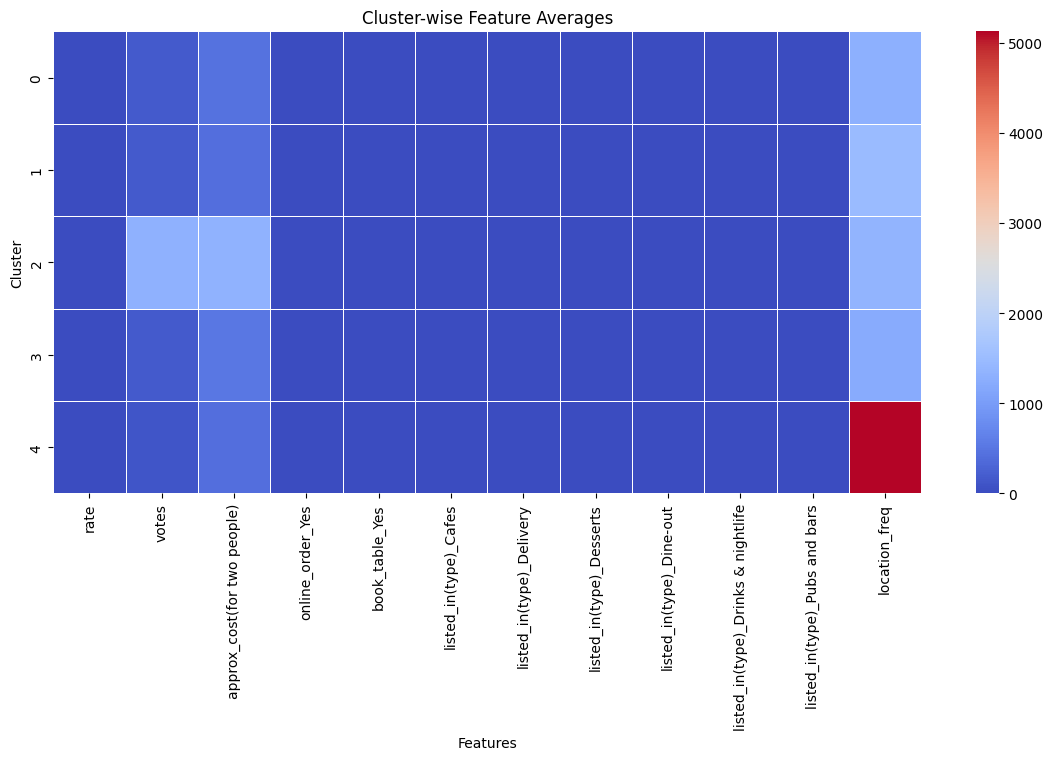

In [125]:
%pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

cluster_means = original_data.groupby('cluster').mean()

plt.figure(figsize=(14, 6))
sns.heatmap(
    cluster_means,
    annot=False,
    cmap='coolwarm',
    linewidths=0.5
)
plt.title("Cluster-wise Feature Averages")
plt.ylabel("Cluster")
plt.xlabel("Features")
plt.show()
